## Using Oversampling to balance the target variable

In [97]:
# Importing Essential Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [98]:
# Importing the dataset & Glimpse of Dataset

wine= pd.read_csv('winequality.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [99]:
# Checking for nan values

wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [100]:
wine.dropna(inplace=True)

### Data Visualization and Preprocessing

In [101]:
# Performing one hot encoding on type column
df= wine.copy()
df= pd.get_dummies(wine.type, prefix='type', drop_first=True)
wine= wine.join(df)
wine.drop(['type'], axis=1, inplace=True)

In [102]:
wine['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

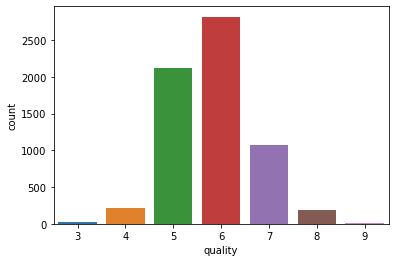

In [103]:
sns.countplot(wine['quality'])

In [104]:
# Using label encoding on the target column

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
wine['quality'] = labelencoder_y.fit_transform(wine['quality'])

In [105]:
X = wine.drop('quality', axis = 1).values
y = wine['quality'].values.reshape(-1,1)

In [106]:
# Performing oversampling to balance the classes of target variable

oversample= RandomOverSampler()
X,y= oversample.fit_resample(X,y)

In [107]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3,1


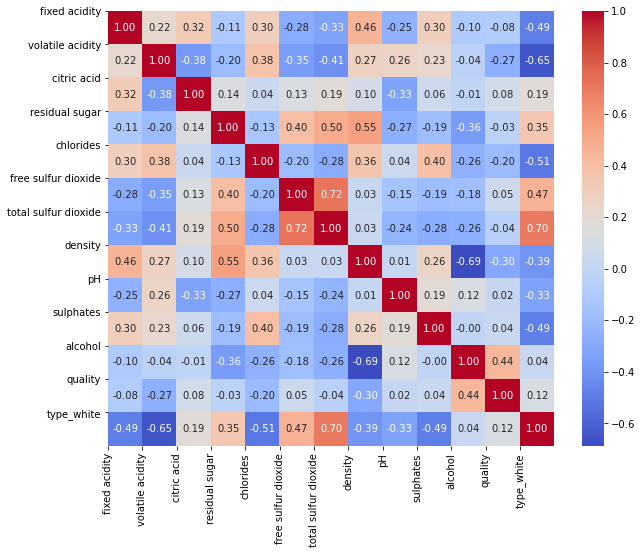

In [108]:
corr = wine.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [109]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (15792, 12)
Shape of X_test:  (3948, 12)
Shape of y_train:  (15792,)
Shape of y_test (3948,)


### Classification Models 

In [111]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### K-Nearest Neighbors (K-NN) 

In [112]:
# Fitting classifier to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [113]:
# Predicting Cross Validation Score

cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.8783559535357259
Training set:  1.0
Test set:  0.8877912867274569


In [114]:
confusion_matrix(y_test, y_pred_knn_test)

array([[586,   0,   0,   0,   0,   0,   0],
       [  0, 591,   0,   0,   0,   0,   0],
       [  6,  42, 442,  25,  20,  15,   1],
       [  4,  48,  87, 261, 107,  58,   3],
       [  3,   3,   0,   4, 509,  16,   1],
       [  0,   0,   0,   0,   0, 564,   0],
       [  0,   0,   0,   0,   0,   0, 552]], dtype=int64)

In [115]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

#### Support Vector Machine (SVM - Linear)

In [116]:
# Fitting classifier to the Training set

from sklearn.svm import SVC
classifier_svm_poly = SVC(kernel = 'poly')
classifier_svm_poly.fit(X_train_scaled, y_train.ravel())

SVC(kernel='poly')

In [117]:
# Predicting Cross Validation Score

cv_svm_poly = cross_val_score(estimator = classifier_svm_poly, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_poly.mean())

y_pred_svm_poly_train = classifier_svm_poly.predict(X_train_scaled)
accuracy_svm_poly_train = accuracy_score(y_train, y_pred_svm_poly_train)
print("Training set: ", accuracy_svm_poly_train)

y_pred_svm_poly_test = classifier_svm_poly.predict(X_test_scaled)
accuracy_svm_poly_test = accuracy_score(y_test, y_pred_svm_poly_test)
print("Test set: ", accuracy_svm_poly_test)

CV:  0.6775576594704227
Training set:  0.6996580547112462
Test set:  0.6818642350557245


In [118]:
confusion_matrix(y_test, y_pred_svm_poly_test)

array([[548,  19,   0,   0,  19,   0,   0],
       [  9, 421,  61,  61,  19,  14,   6],
       [ 11,  89, 281, 134,  33,   3,   0],
       [  7,  34, 111, 225, 139,  48,   4],
       [  2,  18,  15, 110, 306,  83,   2],
       [  0,   7,   2,  54, 135, 359,   7],
       [  0,   0,   0,   0,   0,   0, 552]], dtype=int64)

In [119]:
tp_svm_poly = confusion_matrix(y_test, y_pred_svm_poly_test)[0,0]
fp_svm_poly = confusion_matrix(y_test, y_pred_svm_poly_test)[0,1]
tn_svm_poly = confusion_matrix(y_test, y_pred_svm_poly_test)[1,1]
fn_svm_poly = confusion_matrix(y_test, y_pred_svm_poly_test)[1,0]

#### Random Forest Classification 

In [120]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33, n_jobs=-1)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       n_jobs=-1, random_state=33)

In [121]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10, n_jobs=-1)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9255320624333621
Training set:  1.0
Test set:  0.922998986828774


In [122]:
confusion_matrix(y_test, y_pred_rf_test)

array([[586,   0,   0,   0,   0,   0,   0],
       [  0, 591,   0,   0,   0,   0,   0],
       [  0,   1, 455,  88,   7,   0,   0],
       [  0,   1,  99, 385,  80,   2,   1],
       [  0,   0,   1,  24, 511,   0,   0],
       [  0,   0,   0,   0,   0, 564,   0],
       [  0,   0,   0,   0,   0,   0, 552]], dtype=int64)

In [123]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

In [125]:
models = [('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('SVM (Poly)', tp_svm_poly, fp_svm_poly, tn_svm_poly, fn_svm_poly, accuracy_svm_poly_train, accuracy_svm_poly_test, cv_svm_poly.mean()),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [126]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,K-Nearest Neighbors (KNN),586,0,591,0,1.000000,0.887791,0.878356
1,SVM (Poly),548,19,421,9,0.699658,0.681864,0.677558
2,Random Forest Tree Classification,586,0,591,0,1.000000,0.922999,0.925532
